In [2]:
bisect = (arr,x) -> begin
    l=1
    r=length(arr)
    while r>l
        m = (l+r)>>1
        if x <= arr[m]
            r = m
        else
            l = m+1
        end
    end
    l
end

#1 (generic function with 1 method)

In [1]:
struct Player
    # true skill parameter (skill, stability)
    # 
    skill::Float32
    stability::Float32
    rating::Float32
    ::Float32
end

1

In [ ]:
function calcDist(;deltas, alpha=.95, k=32)
    D = []    
    for _ in 1:k
        Random.shuffle!(deltas)
        append!(D, calcD(deltas, alpha))
    end
    K = Dict()
    for (a,b) in D
        K[a] = get(K,a,0) + 1
        K[b] = get(K,b,0) - 1        
    end    
    K = sort!([[a,b] for (a,b) in K if b != 0], by=first)
    accumulate!((a,b) -> [b[1], a[2]+b[2]], K, K)
    K
end

calcDist (generic function with 4 methods)

In [354]:
function calcD(deltas, alpha)    
    n = length(deltas)
    inside = deltas[1:floor(Int, alpha*n)]
    outside = deltas[(floor(Int, alpha*n)+1):n]    
    D = [[maximum(first, inside), minimum(last, inside)]]    
    filter!(d -> d[1]<=d[2], D)
    for d in outside
        if isempty(D) break end
        res = []        
        for x in D
            append!(res, [
                [x[1], min(x[2], d[1])],
                [max(x[1], d[2]), x[2]]
            ])
        end
        D = res
        filter!(d -> d[1]<=d[2], D)
    end
    D
end

calcD (generic function with 1 method)

In [357]:
deltas = [[1,4], [2,3], [2.5,10]]
@time calcDist(deltas=deltas, alpha=2//3, k=1024)

  0.005747 seconds (23.25 k allocations: 870.656 KiB)


4-element Vector{Vector{Float64}}:
 [2.0, 350.0]
 [2.5, 0.0]
 [3.0, 330.0]
 [4.0, 0.0]

In [602]:
using Pkg; Pkg.add("Distributions")
using Distributions
using Pkg; Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


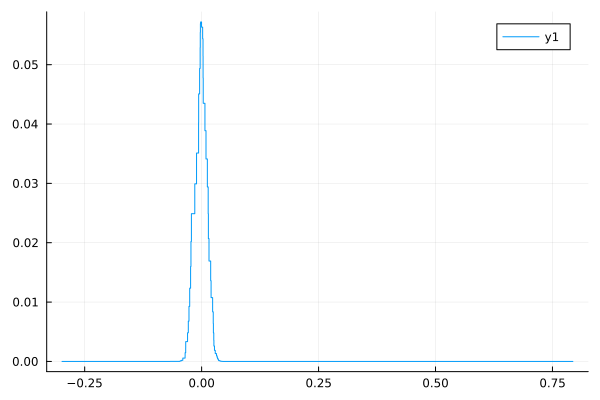

In [625]:
N = 1024
d = 32
α = .05

T = rand(Normal(0,1), N, d)
m = mean(T,dims=2) 
s = std(T,dims=2,corrected=true)
D = @. m + quantile(TDist(d-1), 1-α) * s/sqrt(d)
D = D[:]
sort!(D)


P = @. pdf(Binomial(N,α),1:N)
plot(D, P, seriestype=:steppost)